# Data Exploration

### Import Libraries

In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import emoji

In [36]:
color_map = {"Accepted": "#2ECC71", "For Revision": "#F39C12", "Rejected": "#E74C3C"}

### Load Dataset

In [37]:
df = pd.read_csv('../data/mock-data.csv')
df.head()

,Post_ID,Raw_Caption,Final Status
0,NYC-MOCK-0001,LOOK | The Philippines co-hosts the National Y...,Accepted
1,NYC-MOCK-0002,READ | NYC leads Digital Literacy for student ...,Accepted
2,NYC-MOCK-0003,#AreaNews | SK Leaders in Quezon City complete...,Accepted
3,NYC-MOCK-0004,READ | NYC leads Mental Health Support for LGB...,Accepted
4,NYC-MOCK-0005,READ | NYC leads Climate Action for LGBTQIA+ y...,Accepted


## General EDA

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Post_ID       1000 non-null   object
 1   Raw_Caption   1000 non-null   object
 2   Final Status  1000 non-null   object
dtypes: object(3)
memory usage: 23.6+ KB


The dataset has three columns (Post_ID, Raw_Caption, Final Status) and 1000 rows of social media captions. 

In [39]:
df.columns

Index(['Post_ID', 'Raw_Caption', 'Final Status'], dtype='object')

In [40]:
df.dtypes

Post_ID         object
Raw_Caption     object
Final Status    object
dtype: object

### Class Distribution

In [41]:
df["Final Status"].value_counts()

Final Status
Accepted        713
For Revision    193
Rejected         94
Name: count, dtype: int64

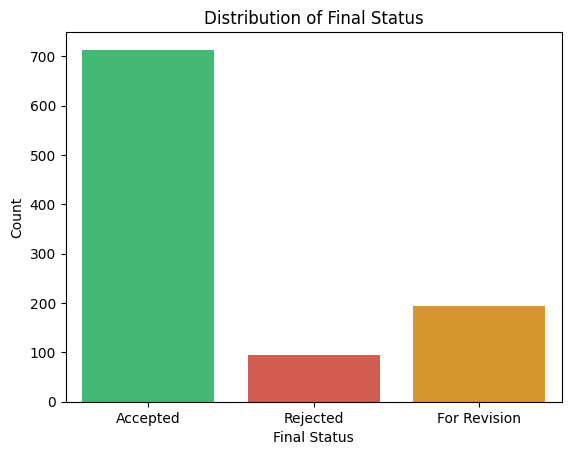

In [42]:
sns.countplot(data=df, x="Final Status", hue = "Final Status", palette=color_map)
plt.title("Distribution of Final Status")
plt.xlabel("Final Status")
plt.ylabel("Count")
plt.show()

Each caption is tagged with one of three labels: Accepted, For Revision, and Rejected. Out of 1000 entries, 713 were accepted, 193 were for revision, and 94 were rejected, indicating a significant class imbalance.

### Missing Values

In [43]:
df.isnull().sum()

Post_ID         0
Raw_Caption     0
Final Status    0
dtype: int64

No missing values in the dataset.

### Duplicates

In [44]:
df.duplicated(subset=["Raw_Caption"]).sum()

np.int64(586)

There are 586 duplicate captions

In [45]:
df[df.duplicated(subset=["Raw_Caption"])]['Final Status'].value_counts()

Final Status
Accepted        328
For Revision    173
Rejected         85
Name: count, dtype: int64

## Class-based Analysis

### Caption Length 

In [ ]:
df["char_length"] = df["Raw_Caption"].str.len()
df["word_count"] = df["Raw_Caption"].str.split().str.len()

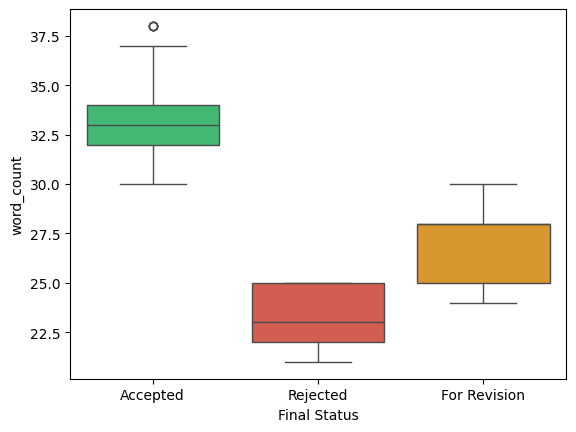

In [47]:
sns.boxplot(x="Final Status", y="word_count", data=df, hue="Final Status", palette=color_map)
plt.show()

Accepted captions tend to have higher word counts. Rejected captions are usually very short while captions tagged as 'For Revision' are usually slightly longer but shorter than accepted captions.

### Emoji count per label

In [65]:
def count_emojis(text):
    return sum(1 for char in text if char in emoji.EMOJI_DATA)

df["emoji_count"] = df["Raw_Caption"].apply(count_emojis)
pd.DataFrame({"Final Status": df["Final Status"], "Emoji Count": df["emoji_count"]}).groupby("Final Status").sum()


,Emoji Count
Final Status,
Accepted,0
For Revision,0
Rejected,0


[remarks]

### Hashtag and URL use per label

In [54]:
df["hashtag_count"] = df["Raw_Caption"].str.count("#")
df["url_present"] = df["Raw_Caption"].str.contains("http", case=False)

In [ ]:
pd.DataFrame({"Final Status": df["Final Status"], "Hashtag Count": df["hashtag_count"], "URL Present": df["url_present"]}).groupby("Final Status").sum()

,Hashtag Count,URL Present
Final Status,,
Accepted,1195,0
For Revision,62,0
Rejected,0,0


[remarks]

## Summary